# <font color=darkred> Lead Scoring Case Study - Logistic Regression
##### by: Abhishek Hegde and Kumar Sambhawam

## <font color=darkblue>Business Understanding and Problem Description:
#### Business:
An education company named __X Education__ sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
#### Marketing:
 The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. <br>

 When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.<br>

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. __The typical lead conversion rate at X education is around 30%.__
 
#### Problem:
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. 
#### Solution Proposed:
To make this process more efficient, the company wishes to identify the most potential leads, also known as __‘Hot Leads’__. <br>

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
    
<img src="image.jpg" align="middle">


__Lead Conversion Process__ - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.<br>

In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.
    
#### Your Job:

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. <br>
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

__The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.__


 

## <font color=darkblue>Data Understanding:

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.<br>

__Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.__

 

## <font color=darkred>Goal:


__Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.__

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

<a id='di'></a>
## <font color=darkred>DATA INSPECTION</font>


In [2]:
leads = pd.DataFrame(pd.read_csv('Leads.csv'))
leads.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- #### <font color=darkblue>We have been provided with 37 features and 9240 records</font>


<a id='dc'></a>
## <font color=darkred>DATA CLEANING</font>


### <font color=darkred>Dropping sales-team generated features:</font>

- These columns are generated after the sales team got in touch with the aspirant and after analysis of this interaction; As this data won't be available for a new prospect, we drop these to eliminate any model bias.


In [4]:
leads = leads.drop(['Last Activity','Lead Quality','Tags','Lead Profile','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Asymmetrique Profile Index'],axis=1)

- ### <font color=darkred>Missing Value Analysis</font>


#### <font color=darkblue>Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. (the user did not select any option)

In [5]:
leads = leads.replace('Select', np.nan)

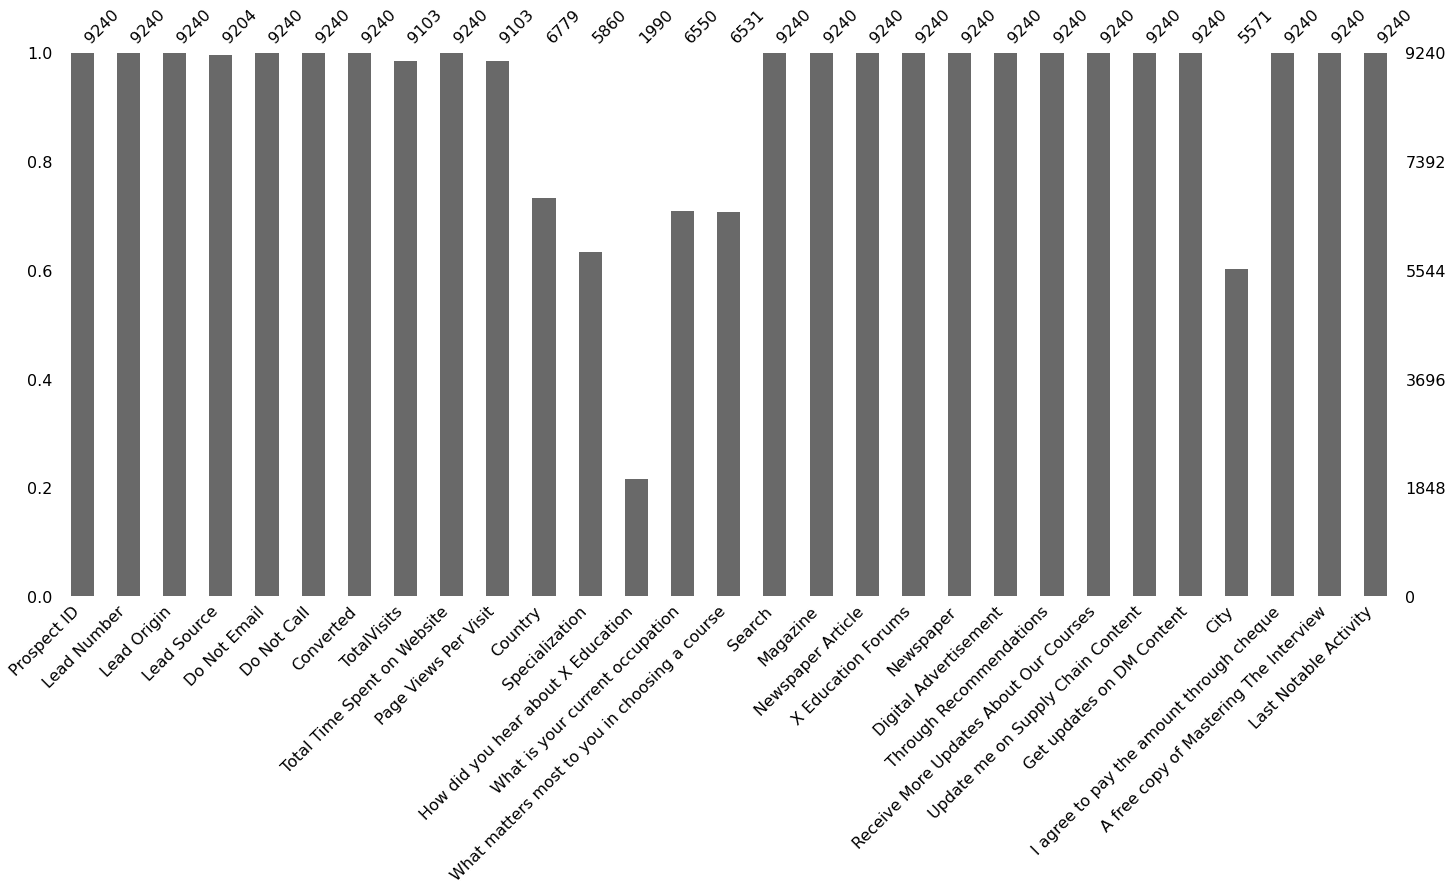

In [6]:
import missingno as msno
msno.bar(leads)

- #### <font color=darkblue>Dropping columns with more than 60% missing values</font>


In [7]:
leads = leads.loc[:, leads.isnull().mean()*100<60]

In [8]:
round(100*(leads.isnull().mean()), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### <font color=darkblue>Column-wise missing value analysis</font>

- #### <font color=darkred>Country:

In [9]:
round(100*(leads.Country.isnull().mean()), 2)

26.63

In [10]:
leads.Country.value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Germany                  0.059006
Canada                   0.059006
Kuwait                   0.059006
South Africa             0.059006
Nigeria                  0.059006
Sweden                   0.044254
Belgium                  0.029503
Italy                    0.029503
China                    0.029503
Ghana                    0.029503
Netherlands              0.029503
Bangladesh               0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Philippines              0.029503
Russia                   0.014751
Denmark       

##### <font color=darkblue> Imputation with Mode: India.

In [11]:
leads['Country'] = leads['Country'].replace(np.nan, 'India')

- #### <font color=darkred>Specialization:

In [12]:
round(100*(leads.Specialization.isnull().mean()), 2)

36.58

In [13]:
leads.Specialization.value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

##### <font color=darkblue>We shall bucket all categories less than 5% into 'Others' category</font>


In [14]:
leads.Specialization = leads.Specialization.replace(['Media and Advertising', 'Travel and Tourism', 'International Business', 'Pay per Click Ads', 'Press_Release',
  'Healthcare Management', 'Hospitality Management', 'E-COMMERCE', 'Rural and Agribusiness', 'E-Business', 'Services Excellence', 'Retail Management'], 'Others')

In [15]:
leads.Specialization.value_counts(normalize=True)*100

Others                               21.143345
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Name: Specialization, dtype: float64

##### <font color=darkblue>No dominant category, we shall name missing values as 'Not Selected'</font>


In [16]:
leads.Specialization = leads.Specialization.replace(np.nan, 'Not Selected')

- #### <font color=darkred>What is your current occupation

In [17]:
round(100*(leads['What is your current occupation'].isnull().mean()), 2)

29.11

In [18]:
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

##### <font color=darkblue> Imputation with Mode: Unemployed.


In [19]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed') 

- #### <font color=darkred>What matters most to you in choosing a course

In [20]:
round(100*(leads['What matters most to you in choosing a course'].isnull().mean()), 2)

29.32

In [21]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

##### <font color=darkblue> Imputation with Mode: 'Better Career Prospects'.


In [22]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects') 

- #### <font color=darkred>City                                             


In [23]:
round(100*(leads.City.isnull().mean()), 2)

39.71

In [24]:
leads['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

##### <font color=darkblue>Imputation with Mode: 'Mumbai'.

In [25]:
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

- #### <font color=darkred> Rest missing values are under 2% so we can drop these rows.


In [26]:
leads.dropna(inplace = True)

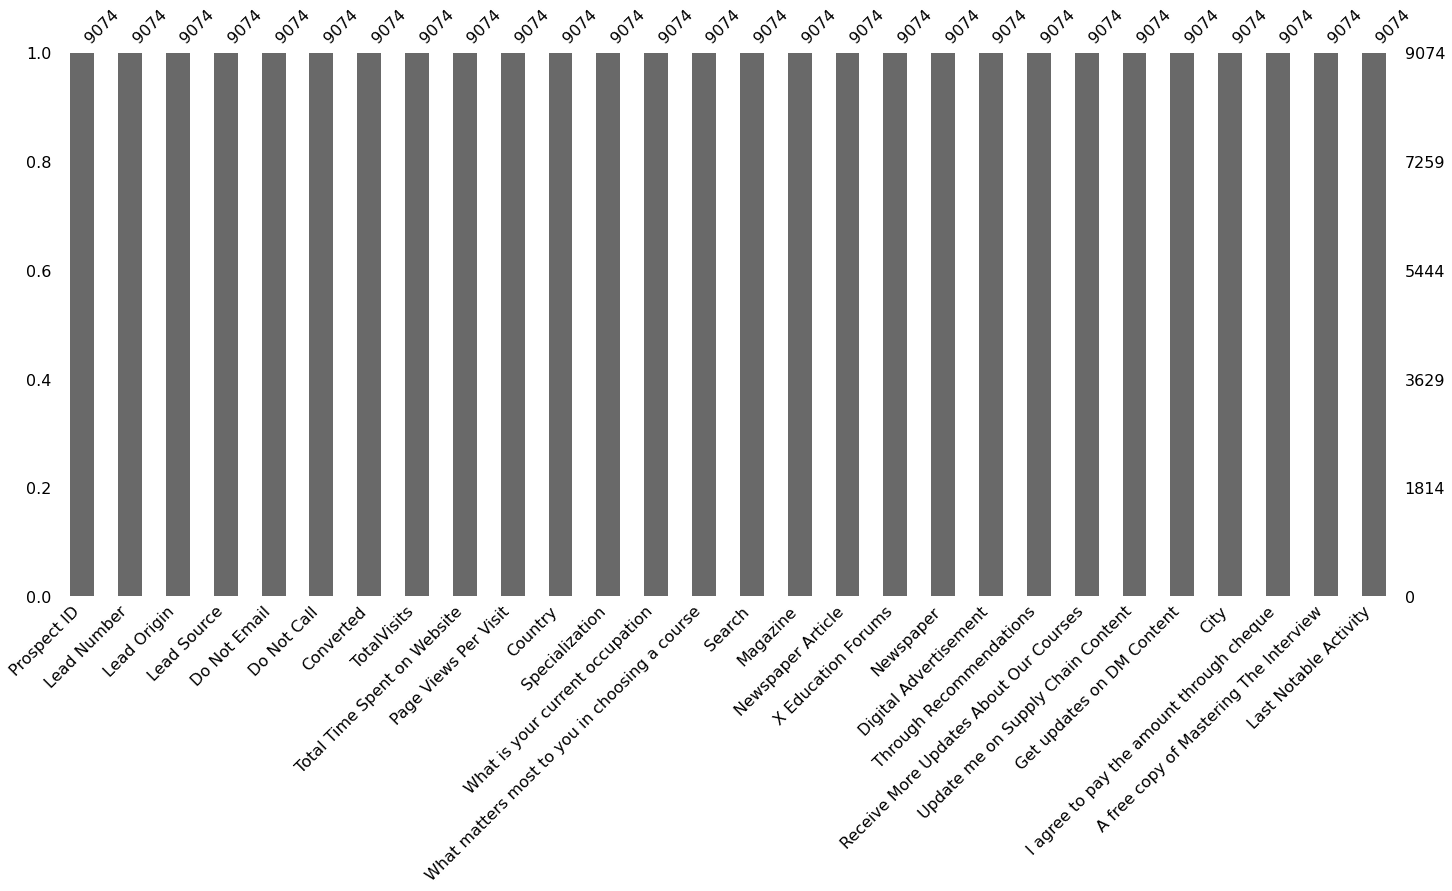

In [27]:
msno.bar(leads)

- ##### <font color=darkblue>Dealt with all missing values, Retained 9074/9240 (98.2%) records.

<a id='eda'></a>
## <font color=darkred>EDA</font>

- ### <font color=darkred> UNIVARIATE ANALYSIS

- #### <font color=darkred> Target variable: 'Converted'

In [28]:
leads['Converted'].mean()*100

37.85541106458012

- ##### <font color=darkblue>Around 38% of our data are converted leads

- #### <font color=darkred> Lead Origin:

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

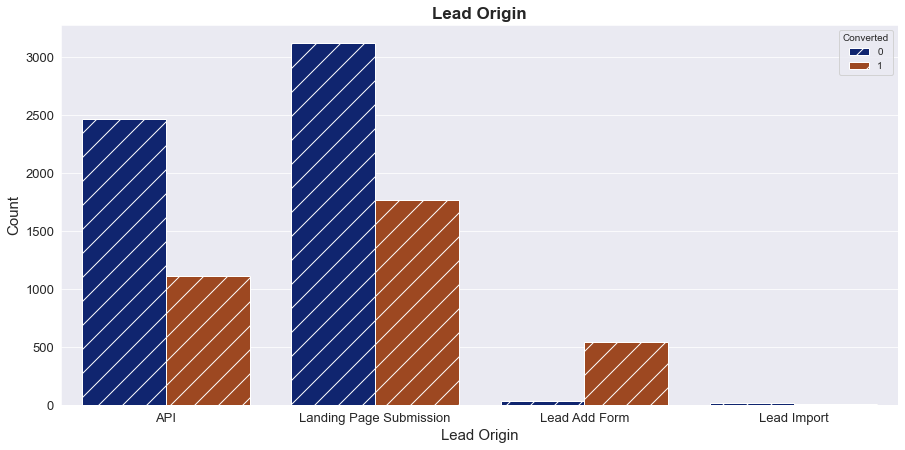

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads, palette="dark", hatch="/")
plt.title("Lead Origin",size = 17, fontweight="bold")
plt.xlabel("Lead Origin",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)

##### <font color=darkblue>Inferences:

    
| Category | Lead Amount | Conversion Rate | 
| :- | :- | :- |
|API| High | Medium (~30%)|
|Landing Page Submission| High | Medium (~35%)|
|Landing Add Form| Low | Very High (~90%)|
|Lead Import| Very Low | Insignificant |

__Focus more on improving lead conversion from 'API' and 'Landing Page Submission' origin and generate more leads from 'Lead Add Form'__

- #### <font color=darkred> Lead Source:

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 <a list of 9 Text major ticklabel objects>)

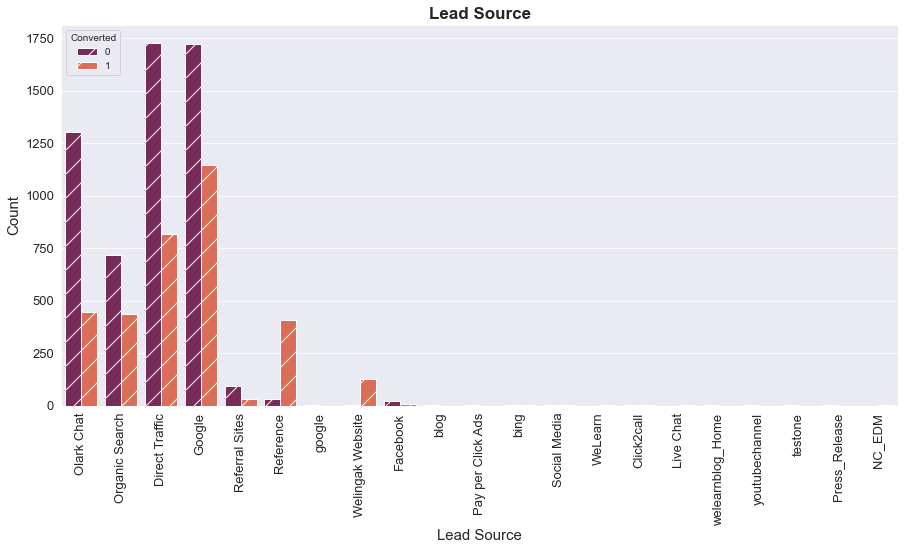

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads, palette="rocket", hatch="/")
plt.title("Lead Source",size = 17, fontweight="bold")
plt.xlabel("Lead Source",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(size = 13,rotation=90)
plt.yticks(size = 13)

##### <font color=darkblue>Bucketing insignificant categories into "Others"

In [31]:
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook','Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 <a list of 9 Text major ticklabel objects>)

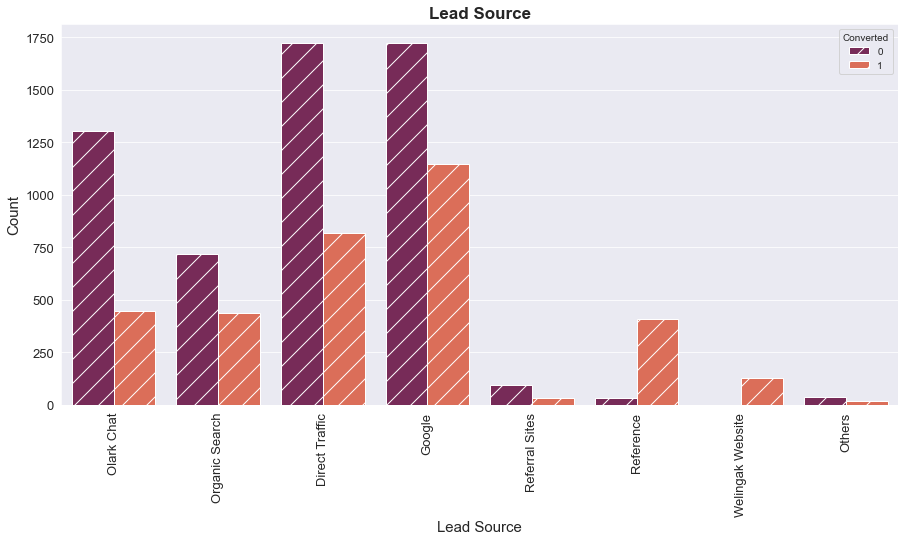

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads, palette="rocket", hatch="/")
plt.title("Lead Source",size = 17, fontweight="bold")
plt.xlabel("Lead Source",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(size = 13,rotation=90)
plt.yticks(size = 13)

##### <font color=darkblue>Inferences:

    
| Category | Lead Amount | Conversion Rate | 
| :- | :- | :- |
|Olark Chat| High | Medium (~23%)|
|Organic Search | Medium | Medium (~36%)|
|Direct Traffic | High | Medium (~32%)|
|Google| High |  Medium (~39%)|
|Referal Sites| Low | Insignificant |
|Reference | Low | High |
|Wellingak Website| Very Low | Very High |
|Others| Insignificant | Insignificant |    
    
__Focus on improving lead converion from 'Olark Chat', 'Organic Search', 'Direct Traffic', and 'Google' and generate more leads through 'Reference' and 'Welingak Website'__

- #### <font color=darkred> Do not call:

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

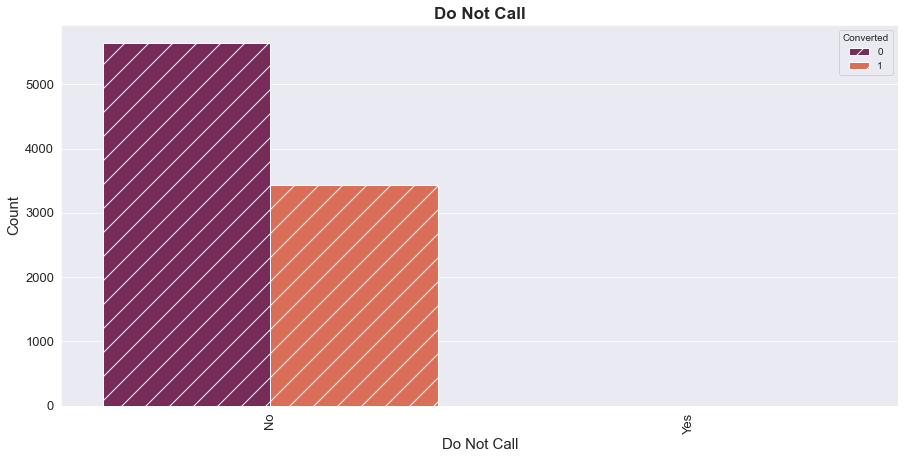

In [33]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads, palette="rocket", hatch="/")
plt.title("Do Not Call",size = 17, fontweight="bold")
plt.xlabel("Do Not Call",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(size = 13,rotation=90)
plt.yticks(size = 13)

In [34]:
leads['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

##### <font color=darkblue>This column is insensitive, not much variance, hence we shall drop it:


In [35]:
leads = leads.drop(['Do Not Call'],axis=1)

- #### <font color=darkred> Do not Email:

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

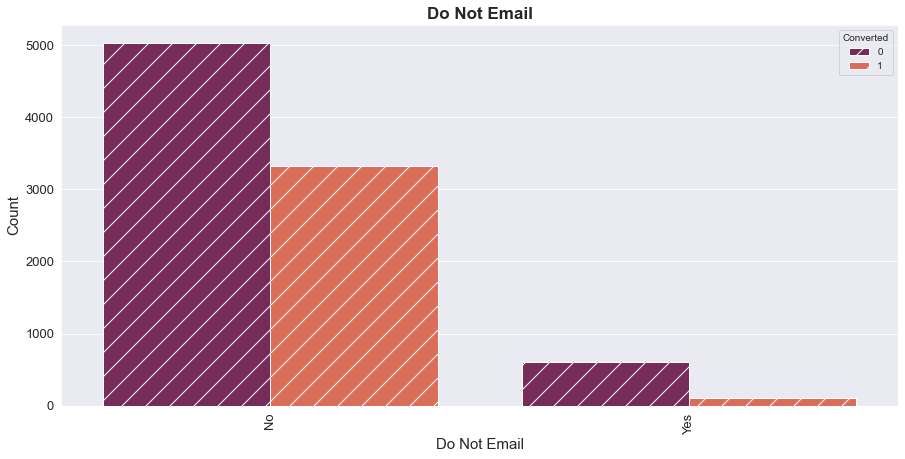

In [36]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads, palette="rocket", hatch="/")
plt.title("Do Not Email",size = 17, fontweight="bold")
plt.xlabel("Do Not Email",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(size = 13,rotation=90)
plt.yticks(size = 13)

In [37]:
leads['Do Not Email'].value_counts()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

##### <font color=darkblue>This column is insensitive, not much variance, most values are 'No', hence we shall drop it:


In [38]:
leads = leads.drop(['Do Not Email'],axis=1)

- #### <font color=darkred> Total Visits:

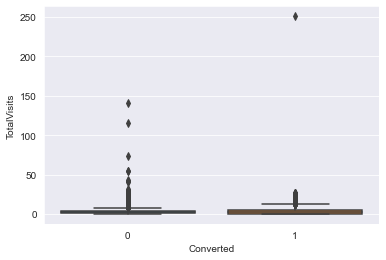

In [39]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)

##### <font color=darkblue>Too many ouliers, let's handle them first:

In [40]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

##### <font color=darkblue>Capping High range outliers to upper fence at 95%ile

In [41]:
leads['TotalVisits'].quantile([0.95]).values[0]

10.0

In [42]:
leads['TotalVisits'][leads['TotalVisits'] >= leads['TotalVisits'].quantile([0.95]).values[0]] = leads['TotalVisits'].quantile([0.95]).values[0]

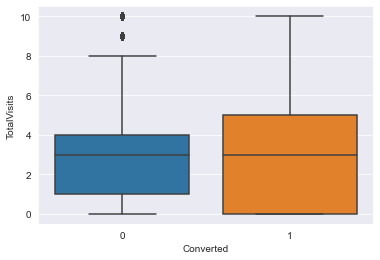

In [43]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)

##### <font color=darkblue>Inferences:
- Median for converted and not converted leads are the same.

__No prominent pattern observed in Total Visits.__

- #### <font color=darkred> Total time spent on website:

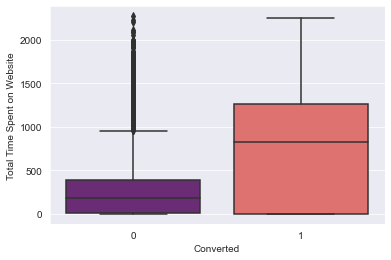

In [44]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads, palette='magma')

##### <font color=darkblue>Inferences:
- People spending more time on the website have more chances of getting converted.

__Focus should be given on making the website more user friendly and engaging content should be displayed to make leads spend more time.__

- #### <font color=darkred> Page views per visit:

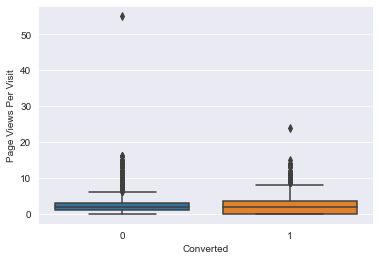

In [45]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)

##### <font color=darkblue>Too many ouliers, let's handle them first:

In [46]:
leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

##### <font color=darkblue>Capping High range outliers to upper fence at 99%ile

In [47]:
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= leads['Page Views Per Visit'].quantile([0.99]).values[0]] = leads['Page Views Per Visit'].quantile([0.9]).values[0]

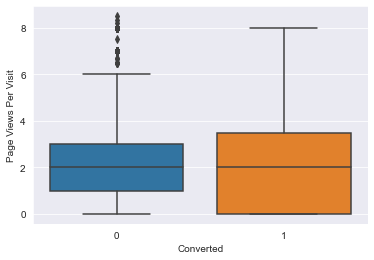

In [48]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)

##### <font color=darkblue>Inferences:
- Median for converted and not converted leads are the same.

__No prominent pattern observed in Page Views Per Visit.__

- #### <font color=darkred>Country:

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

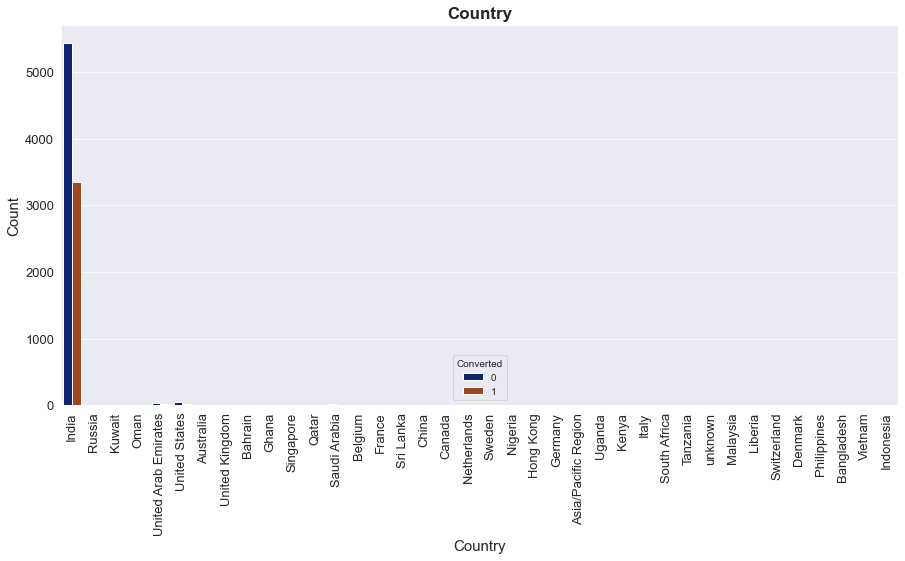

In [49]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(x = "Country", hue = "Converted", data = leads, palette="dark")
plt.title("Country",size = 17, fontweight="bold")
plt.xlabel("Country",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(size = 13,rotation=90)
plt.yticks(size = 13)

##### <font color=darkblue>This column is insensitive, not much variance,most values are 'India', hence we shall drop it:


In [50]:
leads = leads.drop(['Country'],axis=1)

- #### <font color=darkred>Specialization:

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

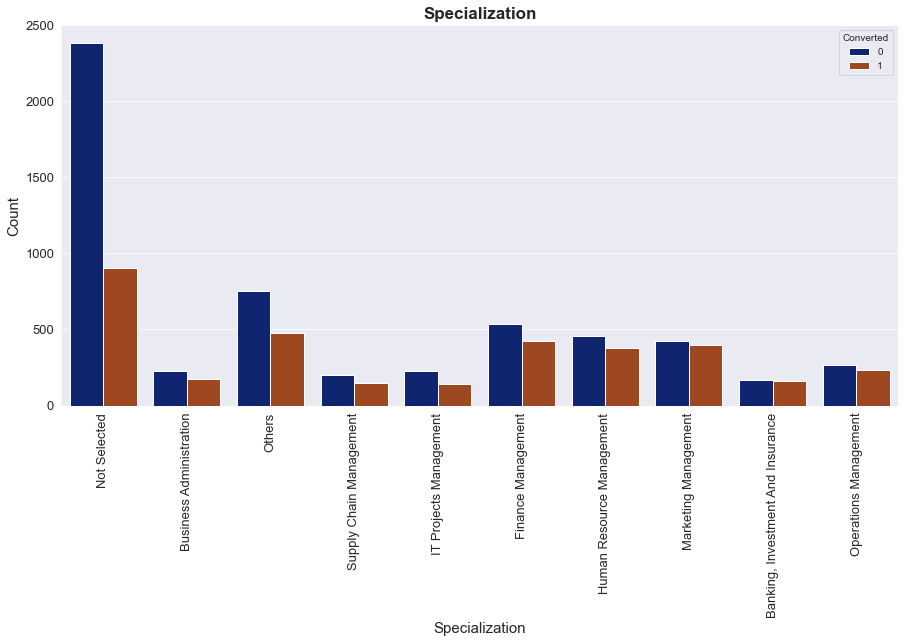

In [51]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(x = "Specialization", hue = "Converted", data = leads, palette="dark")
plt.title("Specialization",size = 17, fontweight="bold")
plt.xlabel("Specialization",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(size = 13,rotation=90)
plt.yticks(size = 13)

##### <font color=darkblue> Inference
- It can be seen that almost all the specializations have a similar conversion rate of 40-50%
- Conversion rate of a person who has selected a specialization is almost twice as one who hasn't (~25%)

__Selecting a prefered specialization should be made a mandatory field to filter out focussed candidates.__

- #### <font color=darkred>What is your current occupation:

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

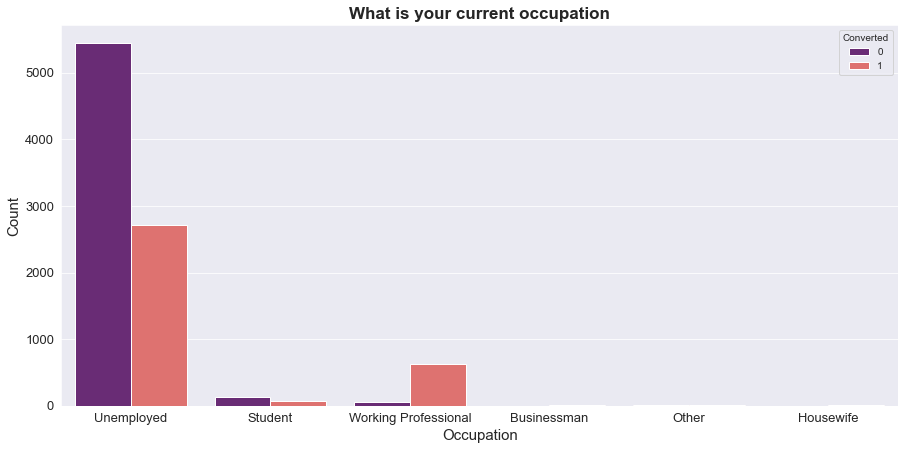

In [52]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads, palette="magma")
plt.title("What is your current occupation",size = 17, fontweight="bold")
plt.xlabel("Occupation",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(size = 13,rotation=0)
plt.yticks(size = 13)

##### <font color=darkblue>Inference
1. Conversion rate for 'Working Professionals' is very high.
2. Most leads are 'Unemployed' and have around 30-35% conversion rate.

__More working professionals should be approched__

- #### <font color=darkred>What matters most to you in choosing a course:

In [53]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

##### <font color=darkblue>This column is insensitive, not much variance,most values are 'Better Career Prospects', hence we shall drop it:


In [54]:
leads = leads.drop(['What matters most to you in choosing a course'],axis=1)

- #### <font color=darkred>Search:

In [55]:
leads['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

##### <font color=darkblue>This column is insensitive, not much variance,most values are 'No', hence we shall drop it:


In [56]:
leads = leads.drop(['Search'],axis=1)

- #### <font color=darkred>Magazine:

In [57]:
leads['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

##### <font color=darkblue>This column is insensitive, no variance at all ,all values are 'No', hence we shall drop it:


In [58]:
leads = leads.drop(['Magazine'],axis=1)

- #### <font color=darkred>Newspaper Article:

In [59]:
leads['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

##### <font color=darkblue>This column is insensitive, almost no variance ,all values but 2 are 'No', hence we shall drop it:


In [60]:
leads = leads.drop(['Newspaper Article'],axis=1)

- #### <font color=darkred>Newspaper:

In [61]:
leads['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

##### <font color=darkblue>This column is insensitive, almost no variance ,all values but 1 are 'No', hence we shall drop it:


In [62]:
leads = leads.drop(['Newspaper'],axis=1)

- #### <font color=darkred>X Education Forums:

In [63]:
leads['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

##### <font color=darkblue>This column is insensitive, almost no variance ,all values but 1 are 'No', hence we shall drop it:


In [64]:
leads = leads.drop(['X Education Forums'],axis=1)

- #### <font color=darkred>This following columns are also insensitive, and show almost no variance , hence we shall drop all of these too:



In [65]:
leads = leads.drop(['Lead Number','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],axis=1)

- #### <font color=darkred>City:

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text major ticklabel objects>)

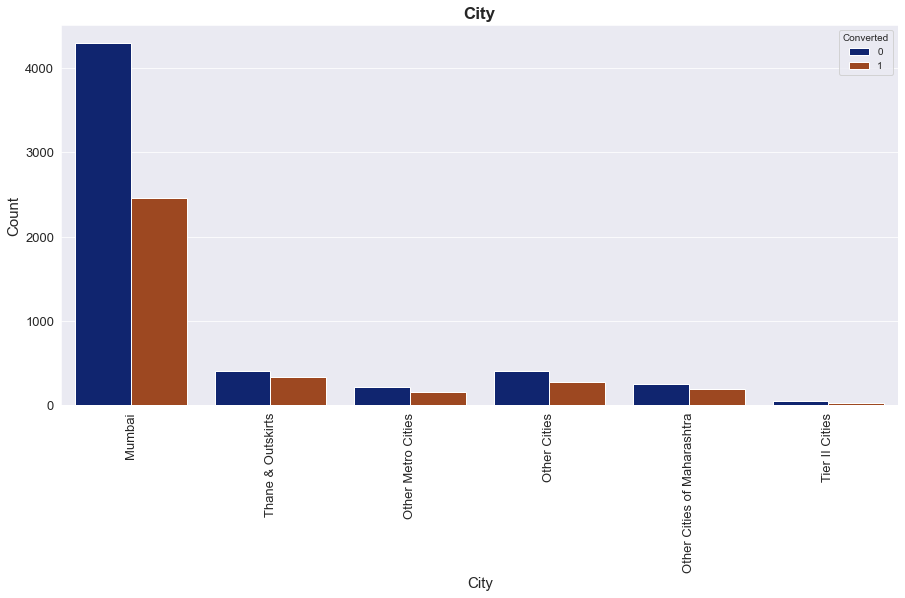

In [66]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(x = "City", hue = "Converted", data = leads, palette="dark")
plt.title("City",size = 17, fontweight="bold")
plt.xlabel("City",size = 15)
plt.ylabel("Count",size = 15)
plt.xticks(size = 13,rotation=90)
plt.yticks(size = 13)

##### <font color=darkblue>Inference
- Most leads are from Mumbai with around 30% conversion rate.

In [67]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Specialization                   9074 non-null   object 
 8   What is your current occupation  9074 non-null   object 
 9   City                             9074 non-null   object 
 10  Last Notable Activity            9074 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.1+ MB


##### <font color=darkblue>We are finally left with 1 categorical target variable, and 9 features- 3 numerical and 6 categorical. (ignoring Prospect ID) 


<a id='modelling'></a>
## <font color=darkred>MODELLING</font>

- ### <font color=darkred>Data Preparation</font>

- #### <font color=darkblue>Categorical Features: Dummification / One-Hot Encoding</font>
    - Creating dummies of 10 categorical features.

In [68]:
dummies = pd.get_dummies(leads[['Lead Origin', 'Lead Source','Specialization','What is your current occupation',
                              'City','Last Notable Activity']], drop_first=True)

leads = pd.concat([leads, dummies], axis=1)

leads = leads.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City','Last Notable Activity'], axis = 1)

In [69]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 7   Lead Origin_Lead Import                               9074 non-null   uint8  
 8   Lead Source_Google                                    9074

##### <font color=darkblue>We now have 1 categorical target variable, and 47 features- 3 numerical and 44 categorical. (ignoring Prospect ID)  


- ### <font color=darkred>Splitting Data</font>

In [70]:
# feature map
X = leads.drop(['Prospect ID','Converted'], axis=1)
# target
y = leads['Converted']

# 70-30 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

- ### <font color=darkred>Scaling</font>

    - 3 numerical features

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1943,-0.432839,1.704380,-0.153953,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456,-0.432839,-0.789845,-0.153953,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6547,0.644762,-0.176811,1.481796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8836,0.285562,2.117949,0.936547,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6529,0.644762,0.315446,1.481796,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


- ### <font color=darkred>Model Building</font>

- #### <font color=darkred>Building model with all 47 features</font>

In [72]:
import statsmodels.api as sm

# Logistic regression model
classifer = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
classifer.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.0
Date:                Sun, 25 Oct 2020   Deviance:                       5239.9
Time:                        17:39:26   Pearson chi2:                 6.45e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.3883   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
TotalVisits                                              0.3133      0.055      5.731      0.000       0.206       0.420
Total Time Spent on Website                              1.1031      0.040     27.266      0.000       1.024       1.182
Page Views Per Visit                                    -0.2205      0.060     -3.705      0.000      -0.337      -0.104
Lead Origin_Landing Page Submission                     -1.0014      0.137     -7.336      0.000      -1.269      -0.734
Lead Origin_Lead Add Form                                0.7114      1.087      0.654      0.513      -1.420       2.843
Lead Origin_Lead Import                                  0.7662      0.836      0.917      0.359      -0.872       2.404
Lead Source_Google                                       0.3712      0.096      3.853      0.000       0.182       0.560
Lead Source_Olark Chat                                   1.3122      0.158      8.319      0.000       1.003       1.621
Lead Source_Organic Search                               0.1405      0.129      1.089      0.276      -0.112       0.393
Lead Source_Others                                       0.6162      0.671      0.918      0.359      -0.699       1.932
Lead Source_Reference                                    2.9668      1.112      2.667      0.008       0.787       5.147
Lead Source_Referral Sites                               0.0429      0.329      0.130      0.896      -0.601       0.687
Lead Source_Welingak Website                             6.3144      1.489      4.240      0.000       3.395       9.233
Specialization_Business Administration                  -0.1468      0.236     -0.623      0.533      -0.608       0.315
Specialization_Finance Management                       -0.2042      0.203     -1.004      0.315      -0.603       0.194
Specialization_Human Resource Management                -0.0702      0.207     -0.340      0.734      -0.475       0.335
Specialization_IT Projects Management                   -0.2387      0.247     -0.965      0.334      -0.723       0.246
Specialization_Marketing Management                      0.0179      0.206      0.087      0.931      -0.386       0.421
Specialization_Not Selected                             -1.3024      0.211     -6.161      0.000      -1.717      -0.888
Specialization_Operations Management                    -0.2544      0.230     -1.107      0.268      -0.705       0.196
Specialization_Others                                   -0.2979      0.198     -1.503      0.133      -0.686       0.091
Specialization_Supply Chain Management                  -0

#### <font color=darkred>Coarse Tuning with RFE</font>
- Reducing 47 features to Top 15.

In [73]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(classifer, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Others', False, 8),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 24),
 ('Specialization_Finance Management', False, 16),
 ('Specialization_Human Resource Management', False, 28),
 ('Specialization_IT Projects Management', False, 15),
 ('Specialization_Marketing Management', False, 19),
 ('Specialization_Not Selected', True, 1),
 ('Specialization_Operations Management', False, 14),
 ('Specialization_Others', False, 13),
 ('Specialization_Supply Chain Management', False, 25),
 ('What is your c

##### <font color=darkblue> Selected features TOP 15 after RFE

In [75]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Specialization_Not Selected',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

##### <font color=darkblue> Dropped features

In [76]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Rece

##### <font color=darkblue>Building a model with these Top 15 features

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2688.9
Date:                Sun, 25 Oct 2020   Deviance:                       5377.7
Time:                        17:39:29   Pearson chi2:                 6.54e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4695      0.122     -3.839      0.000      -0.709      -0.230
Total Time Spent on Website                              1.1190      0.040     28.117      0.000       1.041       1.197
Lead Origin_Landing Page Submission                     -1.2058      0.127     -9.517      0.000      -1.454      -0.957
Lead Origin_Lead Add Form                                0.7808      1.013      0.771      0.441      -1.204       2.766
Lead Origin_Lead Import                                  1.0238      0.503      2.034      0.042       0.037       2.010
Lead Source_Olark Chat                                   0.9345      0.120      7.803      0.000       0.700       1.169
Lead Source_Reference                                    2.5441      1.034      2.461      0.014       0.518       4.570
Lead Source_Welingak Website                             5.9057      1.432      4.125      0.000       3.100       8.711
Specialization_Not Selected                             -1.2876      0.121    -10.643      0.000      -1.525      -1.050
What is your current occupation_Housewife               23.4403   1.53e+04      0.002      0.999   -3.01e+04    3.01e+04
What is your current occupation_Working Professional     2.7349      0.205     13.342      0.000       2.333       3.137
Last Notable Activity_Email Bounced                     -1.0946      0.533     -2.052      0.040      -2.140      -0.049
Last Notable Activity_Had a Phone Conversation           3.1204      1.140      2.737      0.006       0.886       5.355
Last Notable Activity_Olark Chat Conversation           -0.7215      0.294     -2.454      0.014      -1.298      -0.145
Last Notable Activity_SMS Sent                           1.7045      0.078     21.720      0.000       1.551       1.858
Last Notable Activity_Unreachable                        1.9460      0.526      3.702      0.000       0.916       2.976
========================================================================================================================
"""

##### <font color=darkblue>'What is your current occupation_Housewife' has very high p-value, must drop it as it is insignificant.

In [78]:
col = col.drop('What is your current occupation_Housewife',1)

In [79]:
# rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.4
Date:                Sun, 25 Oct 2020   Deviance:                       5392.7
Time:                        17:39:29   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4653      0.122     -3.807      0.000      -0.705      -0.226
Total Time Spent on Website                              1.1177      0.040     28.126      0.000       1.040       1.196
Lead Origin_Landing Page Submission                     -1.1996      0.127     -9.476      0.000      -1.448      -0.951
Lead Origin_Lead Add Form                                0.7792      1.013      0.769      0.442      -1.206       2.764
Lead Origin_Lead Import                                  1.0199      0.503      2.027      0.043       0.034       2.006
Lead Source_Olark Chat                                   0.9332      0.120      7.797      0.000       0.699       1.168
Lead Source_Reference                                    2.5547      1.033      2.472      0.013       0.529       4.580
Lead Source_Welingak Website                             5.9057      1.431      4.126      0.000       3.100       8.711
Specialization_Not Selected                             -1.2899      0.121    -10.669      0.000      -1.527      -1.053
What is your current occupation_Working Professional     2.7279      0.205     13.314      0.000       2.326       3.129
Last Notable Activity_Email Bounced                     -1.1001      0.533     -2.063      0.039      -2.145      -0.055
Last Notable Activity_Had a Phone Conversation           3.1114      1.140      2.730      0.006       0.877       5.345
Last Notable Activity_Olark Chat Conversation           -0.7243      0.294     -2.464      0.014      -1.300      -0.148
Last Notable Activity_SMS Sent                           1.6973      0.078     21.650      0.000       1.544       1.851
Last Notable Activity_Unreachable                        1.9388      0.526      3.689      0.000       0.909       2.969
========================================================================================================================
"""

##### <font color=darkblue>'Lead Origin_Lead Add Form' has very high p-value, must drop it as it is insignificant.

In [80]:
col = col.drop('Lead Origin_Lead Add Form',1)

In [81]:
# rebuilding the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.7
Date:                Sun, 25 Oct 2020   Deviance:                       5393.3
Time:                        17:39:29   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4586      0.122     -3.761      0.000      -0.698      -0.220
Total Time Spent on Website                              1.1175      0.040     28.130      0.000       1.040       1.195
Lead Origin_Landing Page Submission                     -1.2060      0.126     -9.545      0.000      -1.454      -0.958
Lead Origin_Lead Import                                  1.0150      0.503      2.017      0.044       0.029       2.001
Lead Source_Olark Chat                                   0.9322      0.120      7.792      0.000       0.698       1.167
Lead Source_Reference                                    3.3296      0.234     14.254      0.000       2.872       3.787
Lead Source_Welingak Website                             6.6829      1.015      6.586      0.000       4.694       8.672
Specialization_Not Selected                             -1.2949      0.121    -10.721      0.000      -1.532      -1.058
What is your current occupation_Working Professional     2.7269      0.205     13.306      0.000       2.325       3.129
Last Notable Activity_Email Bounced                     -1.1002      0.533     -2.063      0.039      -2.145      -0.055
Last Notable Activity_Had a Phone Conversation           3.1097      1.140      2.728      0.006       0.875       5.344
Last Notable Activity_Olark Chat Conversation           -0.7257      0.294     -2.469      0.014      -1.302      -0.150
Last Notable Activity_SMS Sent                           1.6973      0.078     21.648      0.000       1.544       1.851
Last Notable Activity_Unreachable                        1.9372      0.526      3.685      0.000       0.907       2.967
========================================================================================================================
"""

##### <font color=darkblue>All values are significant, checking for VIF.


In [82]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.88
6,Specialization_Not Selected,1.83
11,Last Notable Activity_SMS Sent,1.38
0,Total Time Spent on Website,1.29
1,Lead Origin_Landing Page Submission,1.24
4,Lead Source_Reference,1.19
7,What is your current occupation_Working Profes...,1.17
5,Lead Source_Welingak Website,1.08
10,Last Notable Activity_Olark Chat Conversation,1.06
2,Lead Origin_Lead Import,1.01


##### <font color=darkblue>All values are within VIF range, no multicollinearity exists.

In [84]:
vif.reset_index(inplace=True)
vif.index += 1

### <font color=darkred>Final Model with 13 features:

In [85]:
vif[['Features']]

,Features
1,Lead Source_Olark Chat
2,Specialization_Not Selected
3,Last Notable Activity_SMS Sent
4,Total Time Spent on Website
5,Lead Origin_Landing Page Submission
6,Lead Source_Reference
7,What is your current occupation_Working Profes...
8,Lead Source_Welingak Website
9,Last Notable Activity_Olark Chat Conversation
10,Lead Origin_Lead Import


### <font color=darkred>Predictions on train set


In [86]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1943    0.559726
456     0.066849
6547    0.458875
8836    0.870822
6529    0.957392
7798    0.394931
2349    0.119286
5057    0.449247
3954    0.099968
4523    0.890201
dtype: float64

In [87]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.55972585, 0.06684905, 0.45887495, 0.87082247, 0.95739206,
       0.3949311 , 0.11928573, 0.44924722, 0.09996844, 0.89020074])

##### <font color=darkblue>Creating a dataframe with the actual Target variable and the predicted probabilities

In [88]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.559726,1943
1,0,0.066849,456
2,0,0.458875,6547
3,0,0.870822,8836
4,1,0.957392,6529


##### <font color=darkblue>Assigning labels taking cut=off as 0.5

In [89]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.559726,1943,1
1,0,0.066849,456,0
2,0,0.458875,6547,0
3,0,0.870822,8836,1
4,1,0.957392,6529,1


##### <font color=darkblue>Computing Evaluation Metrics taking cut=off as 0.5

In [90]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3578  399]
 [ 851 1523]]


In [91]:
# Let's check the overall accuracy.
print("ACCURACY:")
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

ACCURACY:
0.8031806014800819


In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


print("SENSITIVITY / RECALL:")

print(TP / float(TP+FN))

SENSITIVITY / RECALL:
0.6415332771693345


In [93]:
print("SPECIFICITY:")

print(TN / float(TN+FP))

SPECIFICITY:
0.8996731204425447


In [94]:
print("PRECISION:")

print(TP/ float(TP+FP))

PRECISION:
0.7924037460978148


In [95]:
print("F1 SCORE:")

print(metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

F1 SCORE:
0.7090316573556799


### <font color=darkred>Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

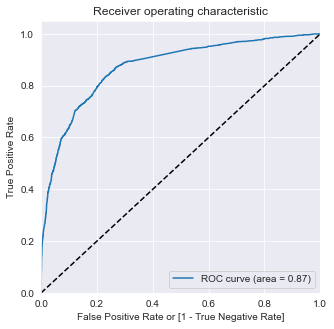

In [97]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### <font color=darkred> Finding Optimal Cutoff Point
##### <font color=darkblue>  Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [98]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.559726,1943,1,1,1,1,1,1,1,0,0,0,0
1,0,0.066849,456,0,1,0,0,0,0,0,0,0,0,0
2,0,0.458875,6547,0,1,1,1,1,1,0,0,0,0,0
3,0,0.870822,8836,1,1,1,1,1,1,1,1,1,1,0
4,1,0.957392,6529,1,1,1,1,1,1,1,1,1,1,1


In [99]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373799  1.000000  0.000000
0.1   0.1  0.560227  0.965880  0.318079
0.2   0.2  0.775154  0.883319  0.710586
0.3   0.3  0.790427  0.840354  0.760624
0.4   0.4  0.803338  0.744735  0.838320
0.5   0.5  0.803181  0.641533  0.899673
0.6   0.6  0.800189  0.579612  0.931858
0.7   0.7  0.779877  0.491997  0.951722
0.8   0.8  0.760353  0.407751  0.970832
0.9   0.9  0.718155  0.268324  0.986673


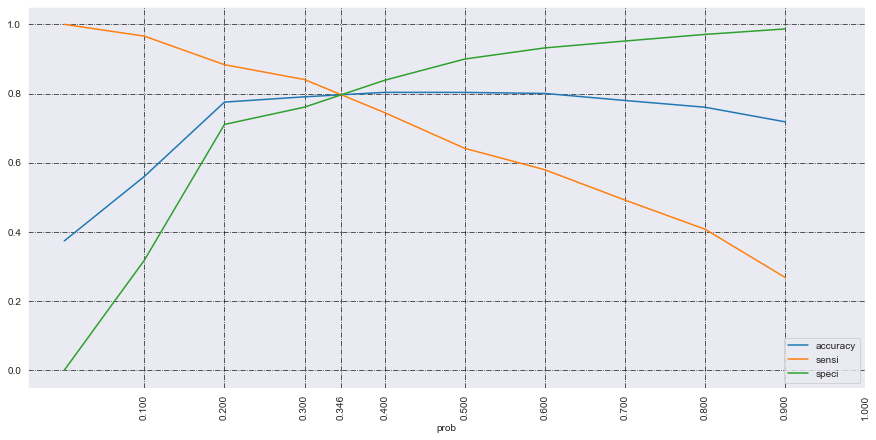

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(15,7))
plt.grid(color='black',alpha=0.8 ,ls = '-.')
plt.xticks([0.1,0.2,0.3,0.346,0.4,0.5,0.6,0.7,0.8,0.9,1.0], rotation=90)
plt.show()

##### <font color=darkblue>Intersection is around 0.346, taking this as cutoff will give a balanced model, but we need to maximise SENSITIVITY or RECALL as we are ok if a uninterested aspirant is approched, but we can't afford to not approach interested candidates as we will be losing business, hence we will take 0.3 as our cutoff as we need a combination of balance as well as a good RECALL in our model. 

##### <font color=darkblue>Assigning labels taking cut=off as 0.3

In [101]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.559726,1943,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.066849,456,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.458875,6547,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.870822,8836,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.957392,6529,1,1,1,1,1,1,1,1,1,1,1,1


### <font color=darkblue>Assigning Lead Score: Probx100

In [102]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.559726,1943,1,1,1,1,1,1,1,0,0,0,0,1,56
1,0,0.066849,456,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.458875,6547,0,1,1,1,1,1,0,0,0,0,0,1,46
3,0,0.870822,8836,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.957392,6529,1,1,1,1,1,1,1,1,1,1,1,1,96


##### <font color=darkblue>Computing Evaluation Metrics taking cut=off as 0.3

In [103]:
# Let's check the overall accuracy.
print("ACCURACY:")
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

ACCURACY:
0.7904267044559912


In [104]:
print("SENSITIVITY / RECALL:")

print(TP / float(TP+FN))

SENSITIVITY / RECALL:
0.8403538331929233


In [105]:
print("SPECIFICITY:")

print(TN / float(TN+FP))

SPECIFICITY:
0.7606235856172995


In [106]:
print("PRECISION:")

print(TP/ float(TP+FP))

PRECISION:
0.6769596199524941


In [107]:
print("F1 SCORE:")

print(metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

F1 SCORE:
0.7090316573556799


### Finally, our 13-feature model was able to obtain:

#### Training Scores:
                - ACCURACY:               79.04%
                - SPECIFICITY:            76.06%
                - SENSITIVITY / RECALL:   84.03%
                - PRECISION:              67.70%
                - F1 SCORE:               70.90%


### <font color=darkred> Predictions on the test set


##### <font color=darkblue>Preparing Test Set
    - Scaling

In [108]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Not Selected,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1943,-0.432839,1.704380,-0.153953,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456,-0.432839,-0.789845,-0.153953,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6547,0.644762,-0.176811,1.481796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8836,0.285562,2.117949,0.936547,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6529,0.644762,0.315446,1.481796,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


    - Retaining only selected features 

In [109]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Not Selected,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
465,-0.250009,1,0,0,0,0,0,0,0,0,0,0,0
5424,0.361195,1,0,0,0,0,0,0,0,0,0,0,0
3503,-0.892323,0,0,1,0,0,1,0,0,0,0,0,0
4465,-0.892323,0,0,1,0,0,1,0,0,0,0,0,0
5394,-0.592210,0,0,1,0,0,0,0,0,0,0,0,0


    - Making test set ready for prediction 

In [110]:
X_test_sm = sm.add_constant(X_test)

    - Making predictions 

In [111]:
y_test_pred = res.predict(X_test_sm)

In [112]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [113]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [114]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [115]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [116]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [117]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,465,0.125209
1,0,5424,0.220807
2,0,3503,0.139620
3,0,4465,0.139620
4,0,5394,0.453095


In [118]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [119]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)

In [120]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,465,0,0.125209
1,5424,0,0.220807
2,3503,0,0.139620
3,4465,0,0.139620
4,5394,0,0.453095


##### <font color=darkblue>Assigning Lead Scores and listing out the Top 50 Leads based on Lead_Score

In [121]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.sort_values('Lead_Score', ascending=False).head(50)

,Prospect ID,Converted,Converted_prob,Lead_Score
2722,2042,1,0.998164,100
347,4662,1,0.996537,100
1379,5697,1,0.998164,100
1352,6937,1,0.996423,100
1345,8293,1,0.999595,100
2157,6179,1,0.997293,100
68,8048,1,0.998164,100
1323,2458,1,0.996423,100
1321,5822,1,0.998164,100
690,7736,1,0.996272,100


##### <font color=darkblue>Assigning labels to test set taking cut=off as 0.3

In [122]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [123]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_predicted
0,465,0,0.125209,13,0
1,5424,0,0.220807,22,0
2,3503,0,0.139620,14,0
3,4465,0,0.139620,14,0
4,5394,0,0.453095,45,1


##### <font color=darkblue>Computing Evaluation Metrics on test set taking cut=off as 0.3

In [124]:
# Let's check the overall accuracy.
print("ACCURACY:")

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

ACCURACY:


0.791039294895336

In [125]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1279,  383],
       [ 186,  875]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
print("SENSITIVITY / RECALL:")

print(TP / float(TP+FN))

SENSITIVITY / RECALL:
0.824693685202639


In [128]:
print("SPECIFICITY:")

print(TN / float(TN+FP))

SPECIFICITY:
0.7695547533092659


In [129]:
print("PRECISION:")

print(TP/ float(TP+FP))

PRECISION:
0.6955484896661367


In [130]:
print("F1 SCORE:")

print(metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

F1 SCORE:
0.7090316573556799


### Finally, our 13-feature model was able to obtain:

#### Test Scores:
                - ACCURACY:               79.10%
                - SPECIFICITY:            76.95%
                - SENSITIVITY / RECALL:   82.47%
                - PRECISION:              69.55%
                - F1 SCORE:               70.90%
                
------------------------------------------------------------------------
                                                                Thank you!       

------------------------------------------------------------------------
